## Import libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import umap
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Load the data

In [26]:
path_to_data_directory = '../data/'
exchange = 'binance'
coin = 'BTC'
interval = '30m'
data = pd.read_csv(path_to_data_directory + exchange + '/' + coin + '/' + interval + '.csv')
data.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,2024-09-17 18:30:00,61001.53,61040.00,60363.81,60540.17,842.67064,2024-09-17 18:59:59.999,5.110573e+07,92376,370.60610,2.246875e+07,0
1,2024-09-17 19:00:00,60540.17,60696.48,60312.00,60420.00,602.84658,2024-09-17 19:29:59.999,3.647998e+07,115625,254.96717,1.542864e+07,0
2,2024-09-17 19:30:00,60419.99,60448.00,59618.26,59967.99,1509.20662,2024-09-17 19:59:59.999,9.058118e+07,206792,626.16312,3.756810e+07,0
3,2024-09-17 20:00:00,59967.98,60210.27,59715.42,60184.15,1018.71827,2024-09-17 20:29:59.999,6.110518e+07,117681,554.74599,3.328095e+07,0
4,2024-09-17 20:30:00,60184.15,60342.85,59980.00,60120.00,646.34324,2024-09-17 20:59:59.999,3.886402e+07,90615,273.99492,1.647614e+07,0


## Preprocessing

split the features and target value

In [27]:
features = data.drop(columns=['Close', 'Open Time', 'Close Time'])
target = data['Close']

features.head()

,Open,High,Low,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,61001.53,61040.00,60363.81,842.67064,5.110573e+07,92376,370.60610,2.246875e+07,0
1,60540.17,60696.48,60312.00,602.84658,3.647998e+07,115625,254.96717,1.542864e+07,0
2,60419.99,60448.00,59618.26,1509.20662,9.058118e+07,206792,626.16312,3.756810e+07,0
3,59967.98,60210.27,59715.42,1018.71827,6.110518e+07,117681,554.74599,3.328095e+07,0
4,60184.15,60342.85,59980.00,646.34324,3.886402e+07,90615,273.99492,1.647614e+07,0


scale the features

In [28]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Dimensionality reduction using isomap and umap

Adjust the n_components and n_neighbors parameters

TODO:
Use Cross Validation with GridSearch to select the best values

In [29]:
# Isomap
isomap_transformer = Isomap(n_components=10, n_neighbors=5) # adjust n_components and n_neighbors 
isomap_features = isomap_transformer.fit_transform(scaled_features)


# Umap
umap_transformer = umap.UMAP(n_components=10, n_neighbors=5, metric='euclidean')
umap_features = umap_transformer.fit_transform(scaled_features)

## Model Training with GBR and RF

### USING ISOMAP

#### GBR

In [30]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(isomap_features, target, test_size=0.2, random_state=42)

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("GBR RMSE:", mean_squared_error(y_test, y_pred_gbr, squared=False))
print("GBR R^2:", r2_score(y_test, y_pred_gbr))

GBR RMSE: 196.59208792418806
GBR R^2: 0.9893204043247777


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### RF

In [31]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RF R^2:", r2_score(y_test, y_pred_rf))

RF RMSE: 208.3990472276716
RF R^2: 0.9879990894508496


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### USING UMAP

#### GBR

In [32]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(umap_features, target, test_size=0.2, random_state=42)

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("GBR RMSE:", mean_squared_error(y_test, y_pred_gbr, squared=False))
print("GBR R^2:", r2_score(y_test, y_pred_gbr))

GBR RMSE: 302.5796682444808
GBR R^2: 0.9747010658157028


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### RF

In [33]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RF R^2:", r2_score(y_test, y_pred_rf))

RF RMSE: 444.7434760039404
RF R^2: 0.9453434880428232


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Cross Validation with GridSearch

In [34]:
all_best_params = {}
all_scores = {}

#### FOR GBR

UMAP

In [35]:
def umap_gbr_gridsearch():
    global all_best_params, all_scores
    X_train, X_test, y_train, y_test = train_test_split(umap_features, target, test_size=0.2, random_state=42)

    gbr = GradientBoostingRegressor()

    # set up a param grid
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        estimator=gbr, 
        param_grid=param_grid, 
        cv=5, 
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
        refit = 'neg_root_mean_squared_error',
        n_jobs=-1, 
        return_train_score=True, 
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

    # Evaluate on test data
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Score (Negative MSE):", test_score)

    all_best_params['umap_gbr'] = grid_search.best_params_
    all_scores['umap_gbr'] = grid_search.cv_results_

isomap

In [36]:
def isomap_gbr_gridsearch():
    global all_best_params, all_scores
    X_train, X_test, y_train, y_test = train_test_split(isomap_features, target, test_size=0.2, random_state=42)

    gbr = GradientBoostingRegressor()

    # set up a param grid
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        estimator=gbr, 
        param_grid=param_grid, 
        cv=5, 
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
        refit = 'neg_root_mean_squared_error',
        n_jobs=-1, 
        return_train_score=True, 
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

    # Evaluate on test data
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Score (Negative MSE):", test_score)

    all_best_params['isomap_gbr'] = grid_search.best_params_
    all_scores['isomap_gbr'] = grid_search.cv_results_

### FOR RF

umap

In [37]:
def umap_rf_gridsearch():
    global all_best_params, all_scores
    X_train, X_test, y_train, y_test = train_test_split(umap_features, target, test_size=0.2, random_state=42)

    rf = RandomForestRegressor()

    # set up a param grid
    param_grid = {
        'n_estimators': [100, 200, 500],           # Number of trees in the forest
        'max_depth': [None, 10, 20, 30, 50],       # Maximum depth of each tree (None allows full depth)
        'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],             # Minimum samples required at a leaf node
        'max_features': [None, 'sqrt', 'log2', 0.5],  # Number of features considered at each split
        'bootstrap': [True, False]                 # Whether bootstrap samples are used
    }

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=5, 
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
        refit = 'neg_root_mean_squared_error',
        n_jobs=-1, 
        return_train_score=True, 
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

    # Evaluate on test data
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Score (Negative MSE):", test_score)

    all_best_params['umap_rf'] = grid_search.best_params_
    all_scores['umap_rf'] = grid_search.cv_results_

isomap

In [38]:
def isomap_rf_gridsearch():
    global all_best_params, all_scores
    X_train, X_test, y_train, y_test = train_test_split(isomap_features, target, test_size=0.2, random_state=42)

    rf = RandomForestRegressor()

    # set up a param grid
    param_grid = {
        'n_estimators': [100, 200, 500],           # Number of trees in the forest
        'max_depth': [None, 10, 20, 30, 50],       # Maximum depth of each tree (None allows full depth)
        'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],             # Minimum samples required at a leaf node
        'max_features': [None, 'sqrt', 'log2', 0.5],  # Number of features considered at each split
        'bootstrap': [True, False]                 # Whether bootstrap samples are used
    }

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=5, 
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
        refit = 'neg_root_mean_squared_error',
        n_jobs=-1, 
        return_train_score=True, 
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

    # Evaluate on test data
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Score (Negative MSE):", test_score)

    all_best_params['isomap_rf'] = grid_search.best_params_
    all_scores['isomap_rf'] = grid_search.cv_results_

main code to run gridsearch:

!! <b>DO NOT RERUN</b> (it takes a while lol)

In [39]:
all_best_params = {}
all_scores = {}
def main():
    print("--------------------------- GBR ---------------------------")
    print("--------------------- ISOMAP FEATURES ---------------------")
    isomap_gbr_gridsearch()
    print("---------------------- UMAP FEATURES ----------------------")
    umap_gbr_gridsearch()
    print("--------------------------- RF ---------------------------")
    print("--------------------- ISOMAP FEATURES ---------------------")
    isomap_rf_gridsearch()
    print("---------------------- UMAP FEATURES ----------------------")

    umap_rf_gridsearch()
print("Do not rerun the script below this, the best parameters have been saved to all_best_params and all scores saved to all_scores")

Do not rerun the script below this, the best parameters have been saved to all_best_params and all scores saved to all_scores


In [40]:
main() # DONT RERUN

--------------------------- GBR ---------------------------
--------------------- ISOMAP FEATURES ---------------------
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 202.2130478965544
Test Set Score (Negative MSE): -201.92278554178216
---------------------- UMAP FEATURES ----------------------
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 330.3571888058325
Test Set Score (Negative MSE): -327.4819119016414
--------------------------- RF ---------------------------
--------------------- ISOMAP FEATURES ---------------------
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 203.3708791149073
Test Set Score (Negative MSE): -190.6331686683556
----------------

GBR with ISOMAP features seems to perform the best so lets further tune the hyperparameters

In [41]:
param_grid = {
    'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.5],
    'max_depth': [2, 3, 4],
    'n_estimators': [50, 100, 200, 300],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2]
}

X_train, X_test, y_train, y_test = train_test_split(isomap_features, target, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"First row of X_train: {X_train[0]}")
gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(
    estimator=gbr, 
    param_grid=param_grid, 
    cv=5, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
    refit = 'neg_root_mean_squared_error',
    n_jobs=-1, 
    return_train_score=True, 
    verbose=1
)

grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

# Evaluate on test data
test_score = grid_search.score(X_test, y_test)
print("Test Set Score (Negative MSE):", test_score)


X_train: (1150, 10), y_train: (1150,)
First row of X_train: [-0.72650094 -3.00496815 -0.4447857   0.26570626  0.31698251  0.48099701
 -0.37597215  0.03725707  0.00396949 -0.21224083]
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 300}
Best Cross-Validation Score: 204.27469815132827
Test Set Score (Negative MSE): -196.49734427416112


Add early stopping

In [42]:
gbr = GradientBoostingRegressor(
    learning_rate=0.1,        # Chosen learning rate
    max_depth=2,               # Chosen depth from best results
    n_estimators=1000,         # Start with a high number of estimators
    validation_fraction=0.1,   # 10% of training data for validation
    n_iter_no_change=10,       # Stop if no improvement for 10 rounds
    tol=0.001,                  # Minimum change to qualify as an improvement
    random_state=42            # Ensure reproducibility
)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test Set Mean Squared Error (MSE):", test_mse)
print("R² Score:", r2)

Test Set Mean Squared Error (MSE): 39147.08016881495
R² Score: 0.9891826192638047


In [43]:
print("Number of boosting stages used:", gbr.n_estimators_)

Number of boosting stages used: 68


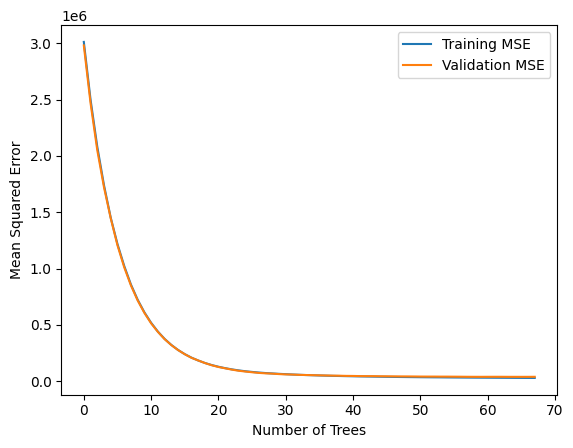

In [44]:
train_scores = []
val_scores = []

for y_train_pred, y_val_pred in zip(gbr.staged_predict(X_train), gbr.staged_predict(X_test)):
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    val_scores.append(mean_squared_error(y_test, y_val_pred))

plt.plot(train_scores, label='Training MSE')
plt.plot(val_scores, label='Validation MSE')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

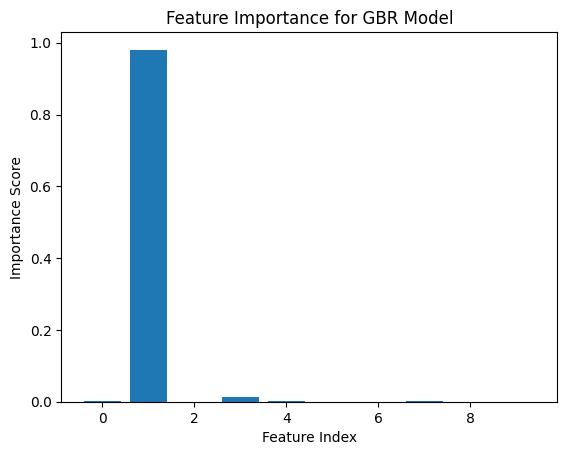

In [45]:
feature_importance = gbr.feature_importances_
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance for GBR Model')
plt.show()

### Conclusion of early stopping

not good for model 
dont use early stopping

### Best model and parameters

GBR with ISOMAP feature

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Best Cross-Validation Score: 300.40086845016674

Test Set Score (Negative MSE): -352.8877389188238

In [46]:
features

,Open,High,Low,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,61001.53,61040.00,60363.81,842.67064,5.110573e+07,92376,370.60610,2.246875e+07,0
1,60540.17,60696.48,60312.00,602.84658,3.647998e+07,115625,254.96717,1.542864e+07,0
2,60419.99,60448.00,59618.26,1509.20662,9.058118e+07,206792,626.16312,3.756810e+07,0
3,59967.98,60210.27,59715.42,1018.71827,6.110518e+07,117681,554.74599,3.328095e+07,0
4,60184.15,60342.85,59980.00,646.34324,3.886402e+07,90615,273.99492,1.647614e+07,0
...,...,...,...,...,...,...,...,...,...
1433,67123.80,67280.00,66925.06,642.28177,4.310064e+07,133320,312.69286,2.098556e+07,0
1434,67280.00,67680.00,67221.58,973.82782,6.571412e+07,168081,540.26358,3.645023e+07,0
1435,67590.67,67590.67,67213.93,847.69876,5.710506e+07,115255,443.29642,2.985796e+07,0
1436,67333.34,67454.00,67122.68,830.09205,5.587618e+07,83608,473.22368,3.185506e+07,0
